### 1. Explain the architecture of LeNet-5 and its significance in the field of deep learning.
ans:
**LeNet-5 Complete Architecture:**

LeNet-5, from the paper Gradient-Based Learning Applied to Document Recognition, is a very efficient convolutional neural network for handwritten character recognition.

**Structure of the LeNet network:**
LeNet5 is a small network, it contains the basic modules of deep learning: convolutional layer, pooling layer, and full link layer. It is the basis of other deep learning models. Here we analyze LeNet5 in depth. At the same time, through example analysis, deepen the understanding of the convolutional layer and pooling layer.

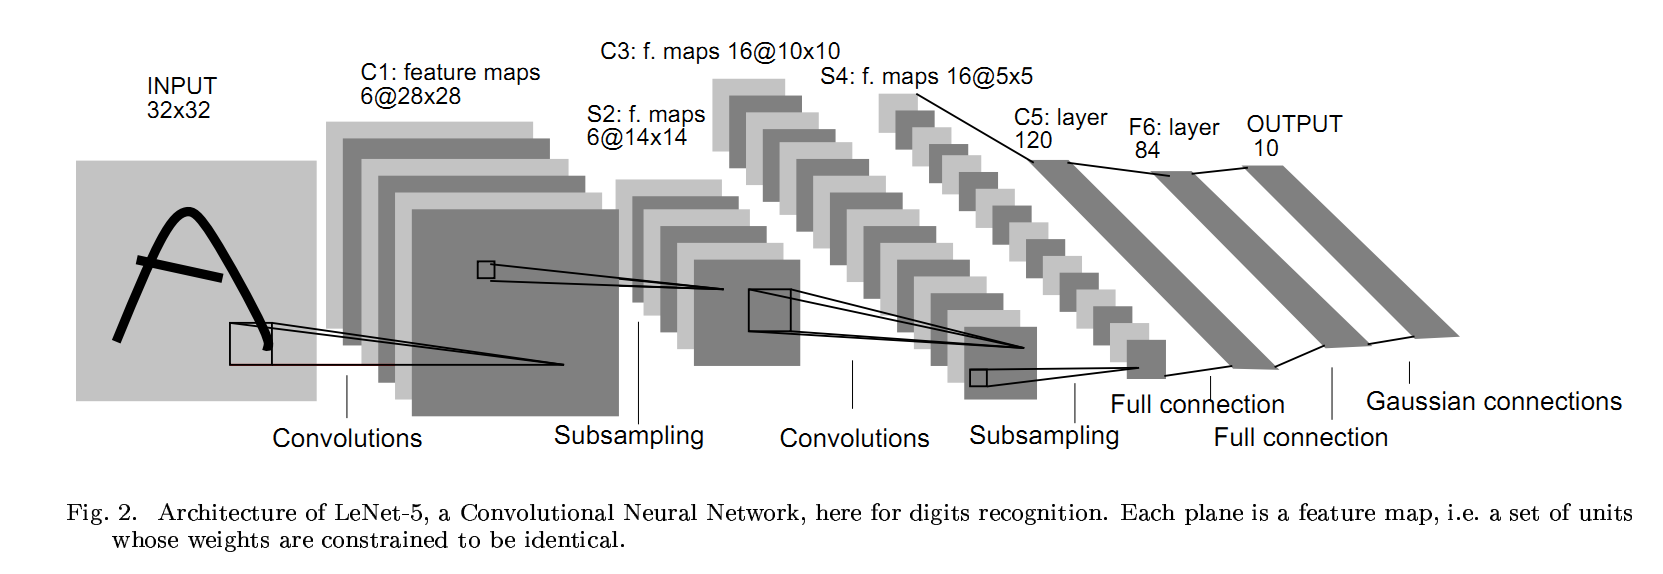

LeNet-5 Total seven layer , does not comprise an input, each containing a trainable parameters; each layer has a plurality of the Map the Feature , a characteristic of each of the input FeatureMap extracted by means of a convolution filter, and then each FeatureMap There are multiple neurons.

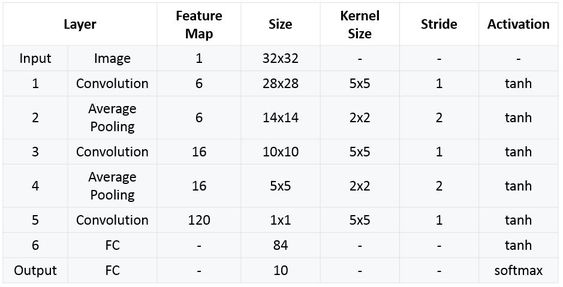

**INPUT LAYER**
The first is the data INPUT layer. The size of the input image is uniformly normalized to 32 * 32.

Note: This layer does not count as the network structure of LeNet-5. Traditionally, the input layer is not considered as one of the network hierarchy.

***C1 layer-convolutional layer:***
- Input picture: 32 * 32
- Convolution kernel size: 5 * 5
- Convolution kernel types: 6
- Output featuremap size: 28 * 28 (32-5 + 1) = 28
- Number of neurons: 28 28 6
- Trainable parameters: (5 5 + 1) 6 (5 * 5 = 25 unit parameters and one bias parameter per filter, a total of 6 filters)
- Number of connections: (5 5 + 1) 6 28 28 = 122304

***Detailed description:***
- The first convolution operation is performed on the input image (using 6 convolution kernels of size 5 5) to obtain 6 C1 feature maps (6 feature maps of size 28 28, 32-5 + 1 = 28).

- Let's take a look at how many parameters are needed. The size of the convolution kernel is 5 5, and there are 6 (5 * 5 + 1) = 156 parameters in total, where +1 indicates that a kernel has a bias.
- For the convolutional layer C1, each pixel in C1 is connected to 5 5 pixels and 1 bias in the input image, so there are 156 28 * 28 = 122304 connections in total. There are 122,304 connections, but we only need to learn 156 parameters, mainly through weight sharing.

***S2 layer-pooling layer (downsampling layer):***
- Input: 28 * 28
- Sampling area: 2 * 2
- Sampling method: 4 inputs are added, multiplied by a trainable parameter, plus a trainable offset. Results via sigmoid
- Sampling type: 6
- Output featureMap size: 14 * 14 (28/2)
- Number of neurons: 14 14 6
- Trainable parameters: 2 * 6 (the weight of the sum + the offset)
- Number of connections: (2 2 + 1) 6 14 14
- The size of each feature map in S2 is 1/4 of the size of the feature map in C1.

***Detailed description:***
- The pooling operation is followed immediately after the first convolution. Pooling is performed using 2 2 kernels, and S2, 6 feature maps of 14 14 (28/2 = 14) are obtained.

- The pooling layer of S2 is the sum of the pixels in the 2 * 2 area in C1 multiplied by a weight coefficient plus an offset, and then the result is mapped again.

- So each pooling core has two training parameters, so there are 2x6 = 12 training parameters, but there are 5x14x14x6 = 5880 connections.

***C3 layer-convolutional layer:***
 - Input: 
  - all 6 or several feature map combinations in S2
- Convolution kernel size: 5 * 5
- Convolution kernel type: 16
- Output featureMap size: 10 * 10 (14-5 + 1) = 10
- Each feature map in C3 is connected to all 6 or several feature maps in S2, indicating that the feature map of this layer is a different combination of the feature maps extracted from the previous layer.
- One way is that the first 6 feature maps of C3 take 3 adjacent feature map subsets in S2 as input. The next 6 feature maps take 4 subsets of neighboring feature maps in S2 as input. The next three take the non-adjacent 4 feature map subsets as input. The last one takes all the feature maps in S2 as input.
- The trainable parameters are: 
  - 6 (3 5 5 + 1) + 6 (4 5 5 + 1) + 3 (4 5 5 + 1) + 1 (6 5 5 +1) = 1516
- Number of connections: 10 10 1516 = 151600

***Detailed description:***
After the first pooling, the second convolution, the output of the second convolution is C3, 16 10x10 feature maps, and the size of the convolution kernel is 5 5. We know that S2 has 6 14 14 feature maps, how to get 16 feature maps from 6 feature maps? Here are the 16 feature maps calculated by the special combination of the feature maps of S2. details as follows:

The first 6 feature maps of C3 (corresponding to the 6th column of the first red box in the figure above) are connected to the 3 feature maps connected to the S2 layer (the first red box in the above figure), and the next 6 feature maps are connected to the S2 layer The 4 feature maps are connected (the second red box in the figure above), the next 3 feature maps are connected with the 4 feature maps that are not connected at the S2 layer, and the last is connected with all the feature maps at the S2 layer. The convolution kernel size is still 5 5, so there are 6 (3 5 5 + 1) + 6 (4 5 5 + 1) + 3 (4 5 5 + 1) +1 (6 5 5 + 1) = 1516 parameters. The image size is 10 10, so there are 151600 connections.

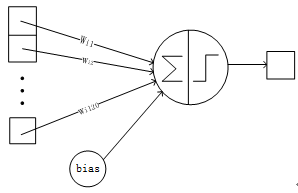

The convolution structure of C3 and the first 3 graphs in S2 is shown below:

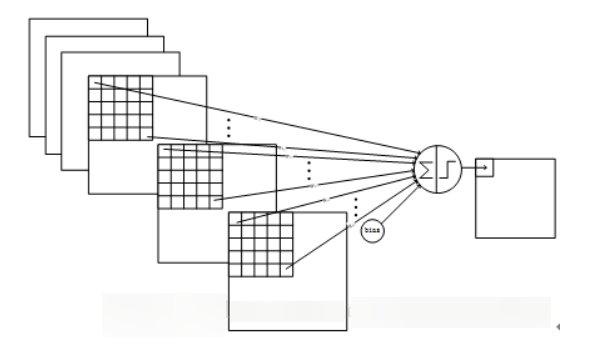

**S4 layer-pooling layer (downsampling layer)-**
- Input: 10 * 10
- Sampling area: 2 * 2
- Sampling method: 4 inputs are added, multiplied by a trainable - parameter, plus a trainable offset. Results via sigmoid
- Sampling type: 16
- Output featureMap size: 5 * 5 (10/2)
- Number of neurons: 5 5 16 = 400
- Trainable parameters: 2 * 16 = 32 (the weight of the sum + the offset)
- Number of connections: 16 (2 2 + 1) 5 5 = 2000
- The size of each feature map in S4 is 1/4 of the size of the feature map in C3.

***Detailed description:***
- S4 is the pooling layer, the window size is still 2 * 2, a total of 16 feature maps, and the 16 10x10 maps of the C3 layer are pooled in units of 2x2 to obtain 16 5x5 feature maps. This layer has a total of 32 training parameters of 2x16, 5x5x5x16 = 2000 connections.
- The connection is similar to the S2 layer.

**C5 layer-convolution layer-**
- Input: All 16 unit feature maps of the S4 layer (all connected to s4)
- Convolution kernel size: 5 * 5
- Convolution kernel type: 120
- Output featureMap size: 1 * 1 (5-5 + 1)
- Trainable parameters / connection: 120 (16 5 * 5 + 1) = 48120

***Detailed description:***
- The C5 layer is a convolutional layer. Since the size of the 16 images of the S4 layer is 5x5, which is the same as the size of the convolution kernel, the size of the image formed after convolution is 1x1. This results in 120 convolution results. Each is connected to the 16 maps on the previous level. So there are (5x5x16 + 1) x120 = 48120 parameters, and there are also 48120 connections. The network structure of the C5 layer is as follows:

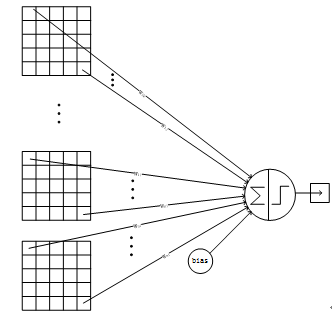

**F6 layer-fully connected layer-**
- Input: c5 120-dimensional vector
- Calculation method: calculate the dot product between the input vector and the weight vector, plus an offset, and the result is output through the sigmoid function.
- Trainable parameters: 84 * (120 + 1) = 10164

***Detailed description:***
- Layer 6 is a fully connected layer. The F6 layer has 84 nodes, corresponding to a 7x12 bitmap, -1 means white, 1 means black, so the black and white of the bitmap of each symbol corresponds to a code. The training parameters and number of connections for this layer are (120 + 1) x84 = 10164. The ASCII encoding diagram is as follows:

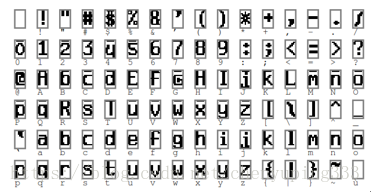

The connection method of the F6 layer is as follows:

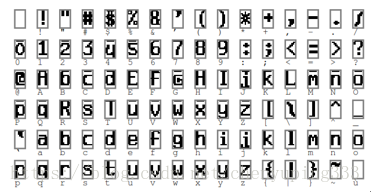

**Output layer-fully connected layer-**
- The output layer is also a fully connected layer, with a total of 10 nodes, which respectively represent the numbers 0 to 9, and if the value of node i is 0, the result of network recognition is the number i. A radial basis function (RBF) network connection is used. Assuming x is the input of the previous layer and y is the output of the RBF, the calculation of the RBF output is:

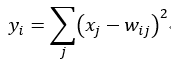

- The value of the above formula w_ij is determined by the bitmap encoding of i, where i ranges from 0 to 9, and j ranges from 0 to 7 * 12-1. The closer the value of the RBF output is to 0, the closer it is to i, that is, the closer to the ASCII encoding figure of i, it means that the recognition result input by the current network is the character i. This layer has 84x10 = 840 parameters and connections.

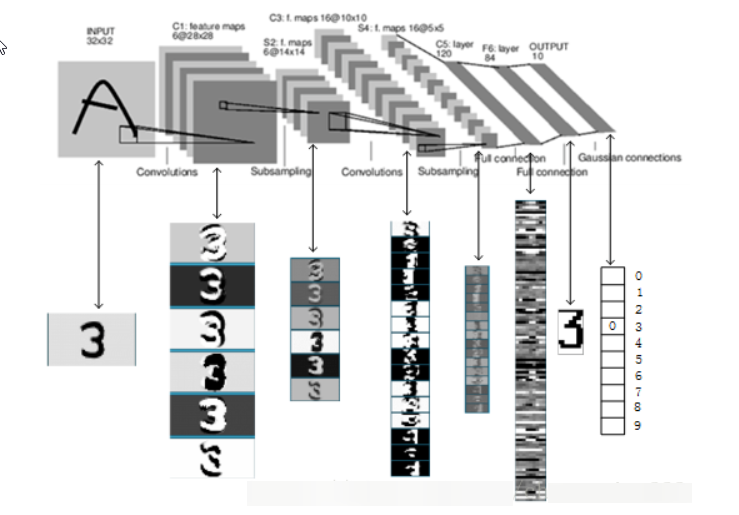

*Summary*
- LeNet-5 is a very efficient convolutional neural network for handwritten character recognition.
- Convolutional neural networks can make good use of the structural information of images.
- The convolutional layer has fewer parameters, which is also determined by the main characteristics of the convolutional layer, that is, local connection and shared weights.

*Advantages of LeNet*
- Efficient Feature Extraction: 
  - Convolutional layers efficiently capture spatial hierarchies in images, which makes the model particularly effective for image data.
- Reduced Parameter Count: 
  - Pooling layers reduce the spatial size, lowering the parameter count and computational load.
- Foundational Design: 
  - LeNet’s design introduced several principles that modern CNN architectures have built upon, including AlexNet, VGG, and ResNet.

### 2. Describe the key components of LeNet-5 and their roles in the network.
ans:


### 3. Discuss the limitations of LeNet-5 and how subsequent architectures like AlexNet addressed these limitations.
ans:


### 4. Explain the architecture of AlexNet and its contributions to the advancement of deep learning.
ans:


### 5. Compare and contrast the architectures of LeNet-5 and AlexNet. Discuss their similarities, differences, and respective contributions to the field of deep learning.
ans:


In [ ]:
# LeNet

import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import numpy as np

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values
x_train = np.expand_dims(x_train, -1)  # Add a channel dimension for grayscale
x_test = np.expand_dims(x_test, -1)

model = Sequential()
model.add(Conv2D(6, kernel_size=(5, 5), activation='tanh', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, kernel_size=(5, 5), activation='tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(120, activation='tanh'))
model.add(Dense(84, activation='tanh'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_acc:.4f}')

*Summary:*
In the LeNet model, convolution, average pooling, and fully connected layers were introduced to the world.


Formula to calculate size of the image after performing convolution

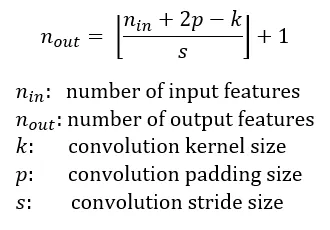